## Questions:
1. What types of jewelry (gems) are used in the products?

2. What metals are used most?

3. What is the average price of jewelry by metal?

4. What is the average price of metal?

5. How many jewelry are in each product type?

6. What is the average price of jewelry in each product type?

7. Top most expensive jewelry types?

- gem: jewelry

- metal: metal

- category: product

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv('/content/cartier_catalog.csv')

In [76]:
df.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [77]:
# df["tags_split"] = df["tags"].str.split(",")

In [78]:
df['tags_split'] = df['tags'].str.split(',')
df["metal"] = df.tags_split.str.get(0).str.strip()
df["first_gem"] = df.tags_split.str.get(1).str.strip()
df["second_gem"] = df.tags_split.str.get(2).str.strip()
df["third_gem"] = df.tags_split.str.get(3).str.strip()
df["fourth_gem"] = df.tags_split.str.get(4).str.strip()
df.fillna(0, inplace=True) #replace 0 in somewhere there dont have value
del df['tags_split'] #remove after we've used that column.

### Some words got wrong grammar so we need to fix it up and make it clear! ⬇

In [79]:
df.replace(["diamond", "diamonds."], "diamonds", inplace=True)
df.replace("sapphire", "sapphires", inplace=True)
df.replace("garnet", "garnets", inplace=True)
df.replace("amethyst", "amethysts", inplace=True)

In [109]:
df.sample(2)

,categorie,price,metal,first_gem,second_gem,third_gem,fourth_gem
459,necklaces,342000.0,yellow gold,emeralds,diamonds,0,0
185,rings,8950.0,pink gold,diamonds,0,0,0


In [81]:
#remove cols unnecessary to use
df.drop(["ref", "title", "description", "image", "tags"], axis=1, inplace=True)

In [111]:
#join rows together
gems = pd.concat([df["first_gem"], df["second_gem"], df["third_gem"], df["fourth_gem"]], axis=0)
gems.to_frame()

,0
0,0
1,0
2,0
3,0
4,0
...,...
687,0
688,0
689,0
690,0


In [112]:
gem_values =  gems.value_counts()[1:].to_frame()
gem_values

,count
diamonds,494
onyx,90
emeralds,70
yellow gold,37
pink gold,37
tsavorite garnets,35
sapphires,21
ceramic,17
lacquer,11
mother-of-pearl,9


In [84]:
gem_values.reset_index(inplace=True)

In [85]:
gem_values.columns = ["gem", "count"]

In [86]:
gem_values

,gem,count
0,diamonds,494
1,onyx,90
2,emeralds,70
3,yellow gold,37
4,pink gold,37
5,tsavorite garnets,35
6,sapphires,21
7,ceramic,17
8,lacquer,11
9,mother-of-pearl,9


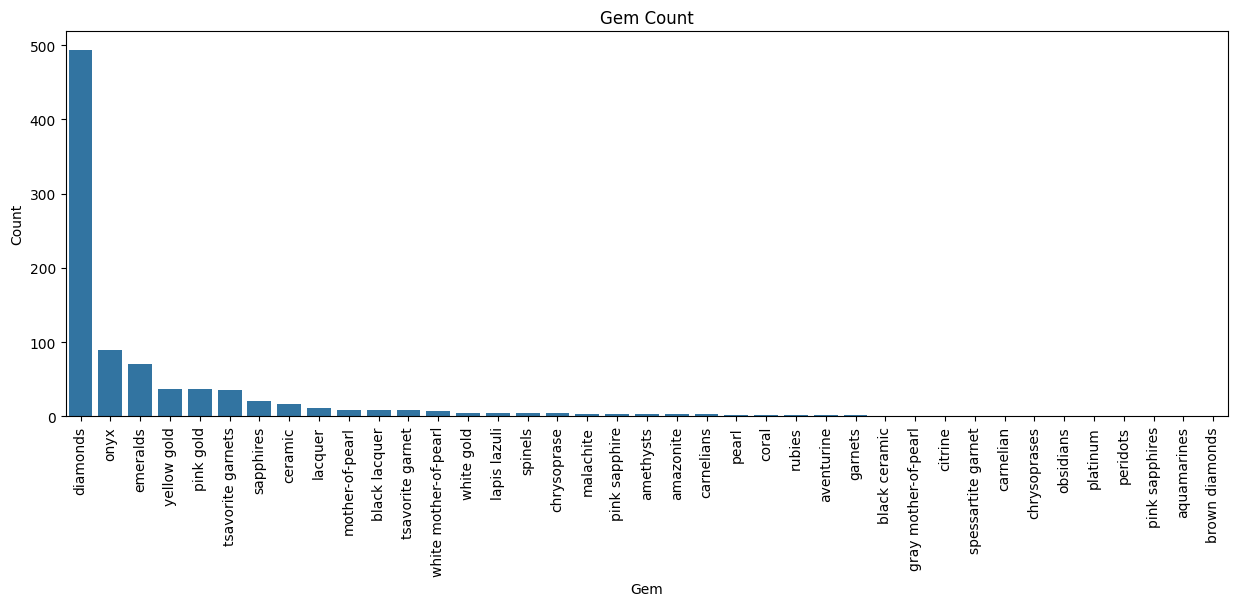

In [87]:
#Visualization
plt.figure(figsize=(15,5))
sns.barplot(x='gem', y='count', data=gem_values)
plt.xlabel("Gem")
plt.ylabel("Count")
plt.title("Gem Count")
plt.xticks(rotation=90)
plt.show()

### -> 1. What types of jewelry (gems) are used in the products? : `diamonds` are used the most in the products.

## Question 2: What metals are used most?
## Câu 2: Kim loại nào được sử dụng trong sản phẩm nhiều nhất

In [88]:
categories_groupby = df.groupby('categorie')["metal"].value_counts().to_frame()

In [89]:
categories_groupby.reset_index()

,categorie,metal,count
0,bracelets,white gold,61
1,bracelets,pink gold,52
2,bracelets,yellow gold,43
3,bracelets,platinum,4
4,earrings,white gold,54
5,earrings,pink gold,34
6,earrings,yellow gold,28
7,earrings,platinum,2
8,necklaces,white gold,66
9,necklaces,pink gold,49


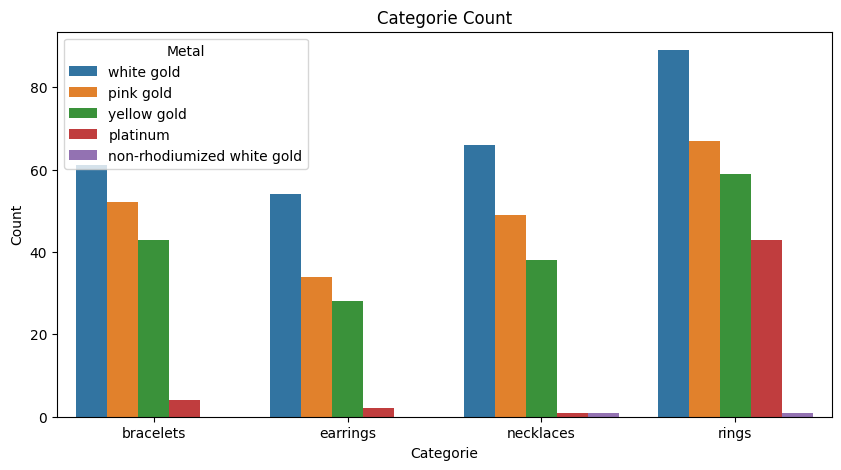

In [90]:
plt.figure(figsize=(10,5))
sns.barplot(x='categorie', y='count', hue="metal", data=categories_groupby)
plt.xlabel("Categorie")
plt.ylabel("Count")
plt.title("Categorie Count")
# plt.legend(title='Metal', loc = "upper right")
plt.legend(title='Metal')
plt.show()

### -> White gold are used the most in product.
## Question 3: What is the average price of jewelry by metal?

In [91]:
ques3 = df.groupby(['categorie','metal'])['price'].mean().round(2).to_frame()

In [92]:
ques3.reset_index()

,categorie,metal,price
0,bracelets,pink gold,28741.92
1,bracelets,platinum,209250.00
2,bracelets,white gold,50363.28
3,bracelets,yellow gold,39504.42
4,earrings,pink gold,8146.47
5,earrings,platinum,117000.00
6,earrings,white gold,36350.56
7,earrings,yellow gold,11328.21
8,necklaces,non-rhodiumized white gold,19700.00
9,necklaces,pink gold,18284.49


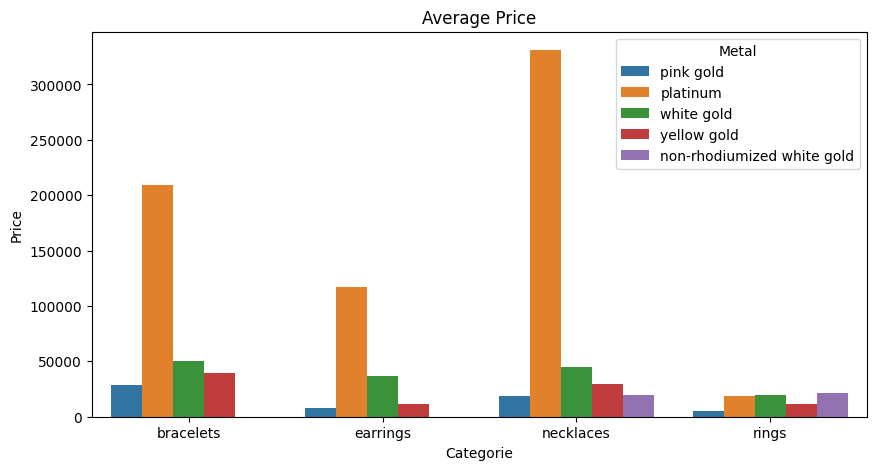

In [93]:
plt.figure(figsize=(10,5))
sns.barplot(x="categorie", y="price", hue="metal", data=ques3)
plt.xlabel("Categorie")
plt.ylabel("Price")
plt.title("Average Price")
plt.legend(title="Metal", loc="upper right")
plt.show()

### -> The average price within 50,000 and 100,000.
## Question 4: What is the average price of metal?

In [94]:
ques4 = df.groupby("metal")["price"].mean().round(2).to_frame()

In [95]:
ques4.reset_index()

,metal,price
0,non-rhodiumized white gold,20550.00
1,pink gold,14917.13
2,platinum,44084.40
3,white gold,35855.22
4,yellow gold,22524.23


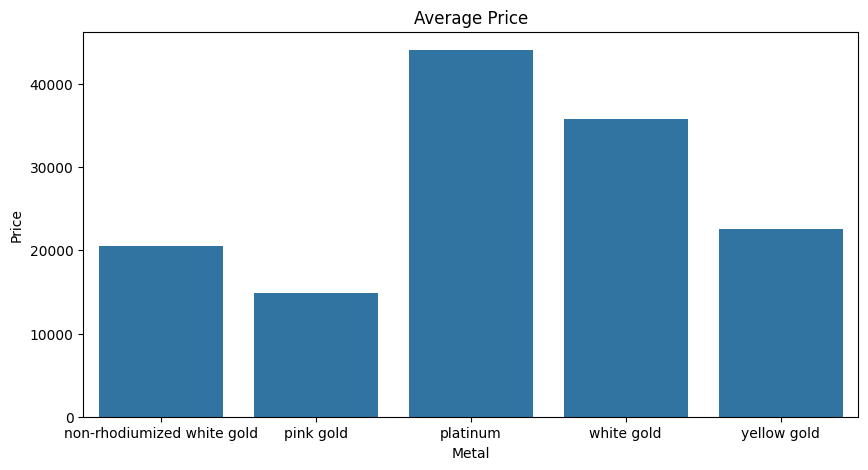

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(x='metal',y='price', data=ques4)
plt.xlabel('Metal')
plt.ylabel('Price')
plt.title('Average Price')
plt.show()

### -> The average price of metal within 20,000 and 30,000.
## Question 5: How many jewelry are in each product type?
##câu 5: có bao nhiêu trang sức(gem) trong mỗi loại sản phẩm(categorie) ⬇

In [97]:
ques5 = df.groupby('categorie')['first_gem'].value_counts().to_frame()

In [98]:
ques5.reset_index()

,categorie,first_gem,count
0,bracelets,diamonds,78
1,bracelets,0,32
2,bracelets,emeralds,15
3,bracelets,tsavorite garnets,7
4,bracelets,ceramic,5
...,...,...,...
63,rings,amazonite,1
64,rings,coral,1
65,rings,chrysoprase,1
66,rings,pink gold,1


In [99]:
ques5.reset_index()

,categorie,first_gem,count
0,bracelets,diamonds,78
1,bracelets,0,32
2,bracelets,emeralds,15
3,bracelets,tsavorite garnets,7
4,bracelets,ceramic,5
...,...,...,...
63,rings,amazonite,1
64,rings,coral,1
65,rings,chrysoprase,1
66,rings,pink gold,1


<ipython-input-100-9ccc93e9d4c4>:2: UserWarning: The palette list has more values (28) than needed (27), which may not be intended.
  sns.barplot(x='categorie', y='count', hue='first_gem', data=ques5, palette=sns.color_palette('cubehelix',28))


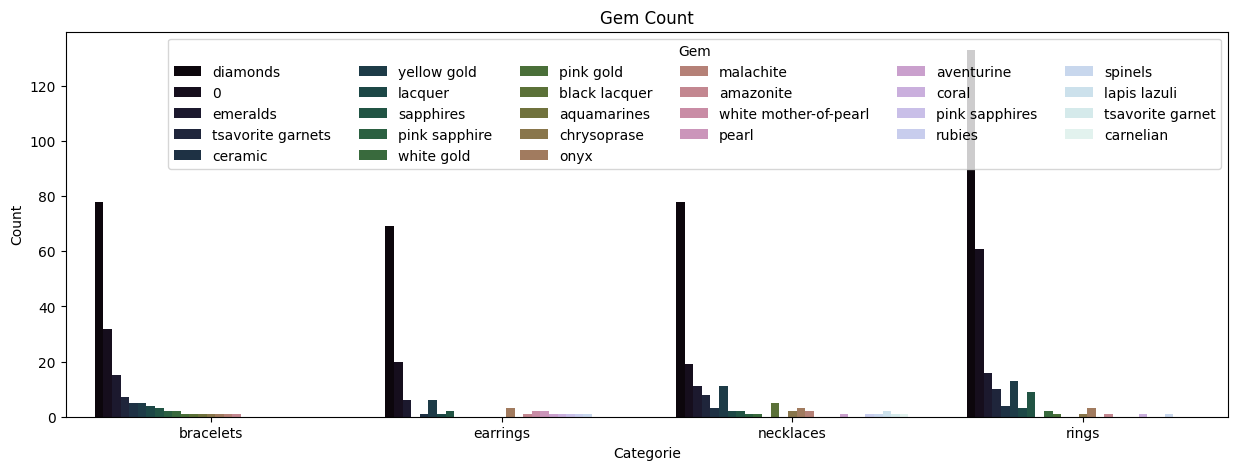

In [100]:
plt.figure(figsize=(15,5))
sns.barplot(x='categorie', y='count', hue='first_gem', data=ques5, palette=sns.color_palette('cubehelix',28))
plt.xlabel('Categorie')
plt.ylabel('Count')
plt.title('Gem Count')
plt.legend(title='Gem', loc='upper right', ncol=6)
plt.show()

## Question 6: What is the average price of jewelry in each product type
## Câu 6: giá trung bình trang sức trong mỗi loại sản phẩm ⬇

In [101]:
ques6 = df.groupby(['categorie', 'first_gem'])['price'].mean().round(2).to_frame()

In [102]:
ques6.reset_index()

,categorie,first_gem,price
0,bracelets,0,7518.75
1,bracelets,amazonite,56000.00
2,bracelets,aquamarines,8250.00
3,bracelets,black lacquer,35000.00
4,bracelets,ceramic,13258.00
...,...,...,...
63,rings,sapphires,60848.89
64,rings,spinels,18500.00
65,rings,tsavorite garnets,8890.00
66,rings,white gold,4975.00


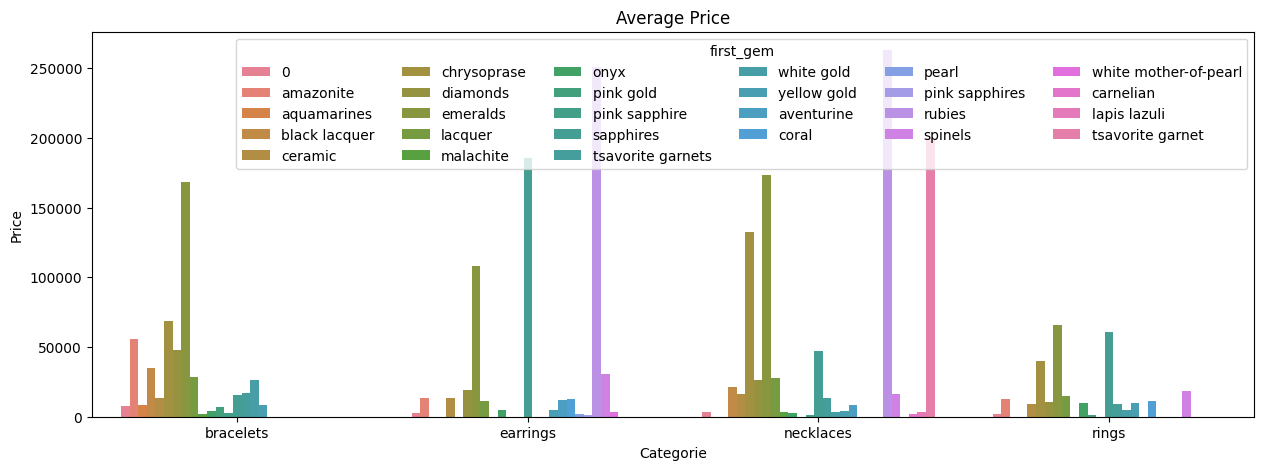

In [103]:
plt.figure(figsize=(15,5))
sns.barplot(x='categorie', y='price', hue='first_gem', data=ques6)
plt.xlabel('Categorie')
plt.ylabel('Price')
plt.legend(title='first_gem', ncol=6)
plt.title('Average Price')
plt.show()

## Question 7: Top most expensive jewelry types
## Câu 7: top loại trang sức đắt tiền nhất

In [104]:
ques7 = df.groupby('first_gem')['price'].mean().round(2).to_frame()

In [105]:
ques7.reset_index()

,first_gem,price
0,0,3635.98
1,amazonite,27400.00
2,aquamarines,8250.00
3,aventurine,9975.00
4,black lacquer,23390.00
5,carnelian,2180.00
6,ceramic,12726.92
7,chrysoprase,93490.00
8,coral,11850.00
9,diamonds,23742.01


In [106]:
ques7.sort_values(by='price', ascending=False, inplace=True)

In [107]:
ques7.reset_index()

,first_gem,price
0,rubies,257000.00
1,tsavorite garnet,200000.00
2,emeralds,127830.21
3,chrysoprase,93490.00
4,sapphires,66168.12
5,amazonite,27400.00
6,diamonds,23742.01
7,black lacquer,23390.00
8,lacquer,22575.00
9,spinels,21800.00


In [108]:
ques7.head(5)

,price
first_gem,
rubies,257000.00
tsavorite garnet,200000.00
emeralds,127830.21
chrysoprase,93490.00
sapphires,66168.12
